In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTTools import remove_special
from hypernetworks.utils.HTGraph import draw_hn
from hypernetworks.utils.HTSpaces import get_space
from hypernetworks.utils.HTLaTex import latex
from hypernetworks.utils.HTAnalysis import ingress_egress_count

# from hypernetworks.utils.HTLaTex import latex

In [2]:
from IPython.display import Image, display, Math, Latex
from IPython.display import JSON

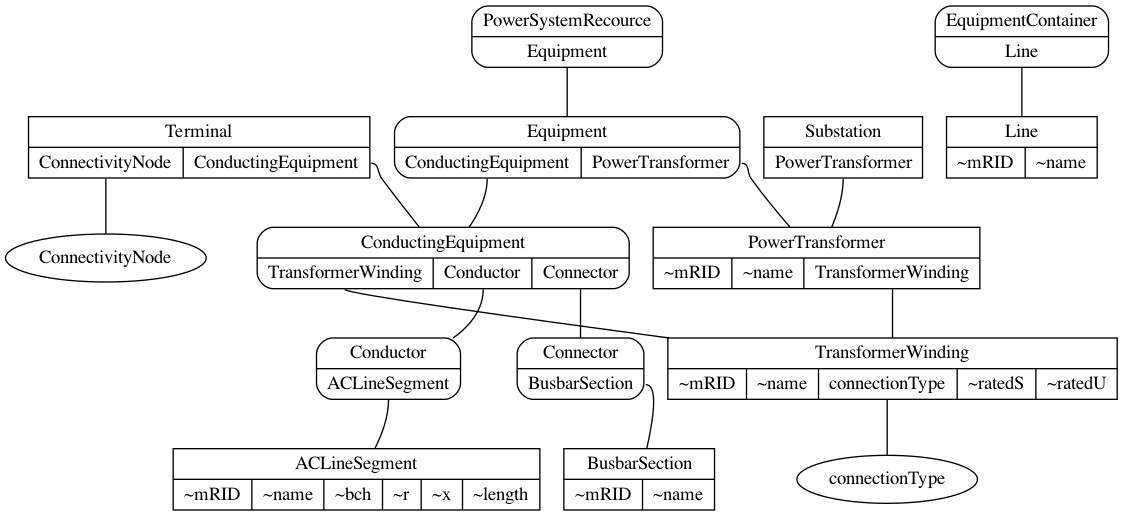

In [3]:
hn = Hypernetwork()
parser = load_parser()

compile_hn(hn, parser, """
    Terminal=<ConnectivityNode, ConductingEquipment>
    PowerSystemRecource={Equipment}
    Substation=<PowerTransformer>
        PowerTransformer=<~mRID, ~name, 
            TransformerWinding=<~mRID, ~name, connectionType, ~ratedS, ~ratedU>>
    Equipment={ConductingEquipment, PowerTransformer}
        ConductingEquipment={TransformerWinding, Conductor, Connector}
        Connector={BusbarSection}
            BusbarSection=<~mRID, ~name>
        EquipmentContainer=<Equipment>
        Conductor={ACLineSegment}
        ACLineSegment=<~mRID, ~name, ~bch, ~r, ~x, ~length>
    EquipmentContainer={Line}
    Line=<~mRID, ~name>
""")

draw_hn(hn, fname="/tmp/MEDA-CIM", view=False, split_camel=False)
Image(filename='/tmp/MEDA-CIM.png', width=1000, height=1200)

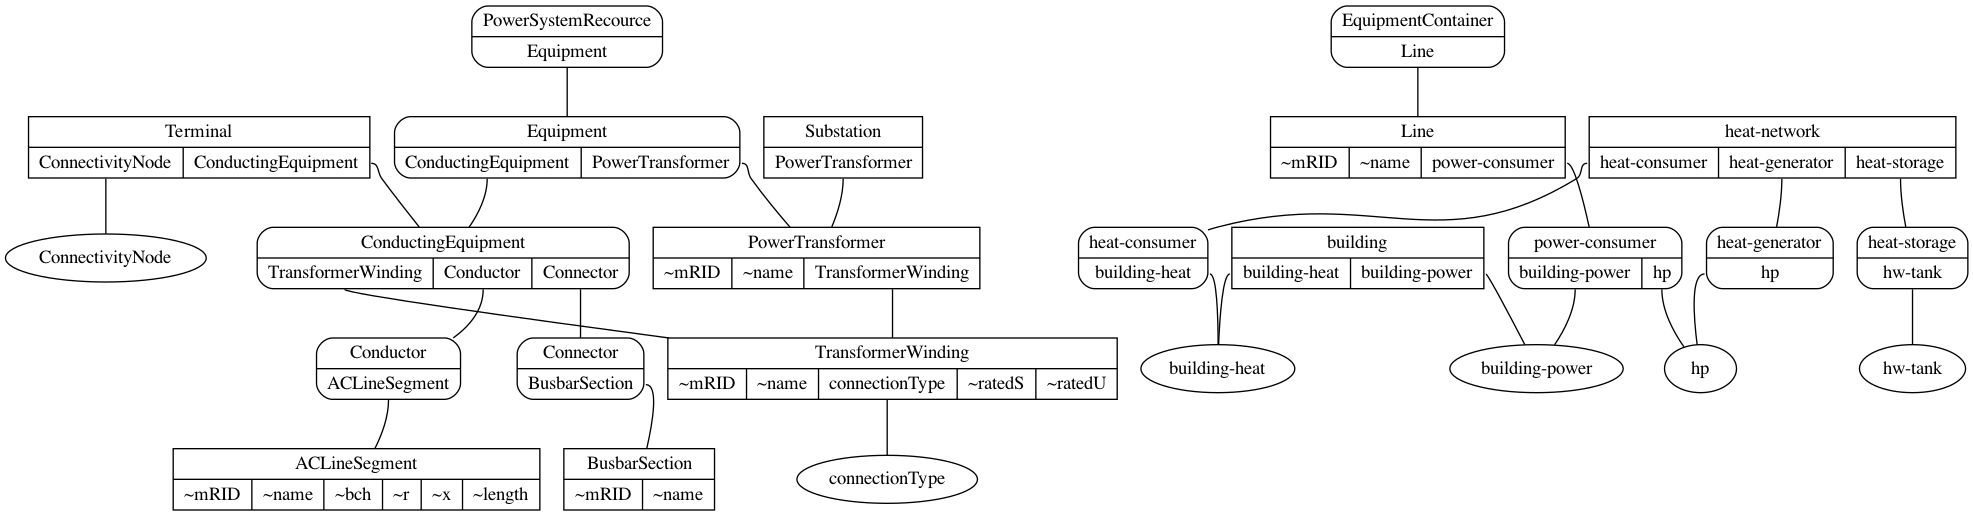

In [4]:
# Add heating

compile_hn(hn, parser, """
    heat-network=<heat-consumer, heat-generator, heat-storage>
        heat-consumer={building-heat}
        heat-generator={hp}
        heat-storage={hw-tank}
    Line=U<power-consumer>
        power-consumer={building-power, hp}
            building=<building-heat, building-power>
""")

draw_hn(hn, fname="/tmp/MEDA-CIM-heat", view=False, split_camel=False)
Image(filename='/tmp/MEDA-CIM-heat.png', width=1600, height=1400)

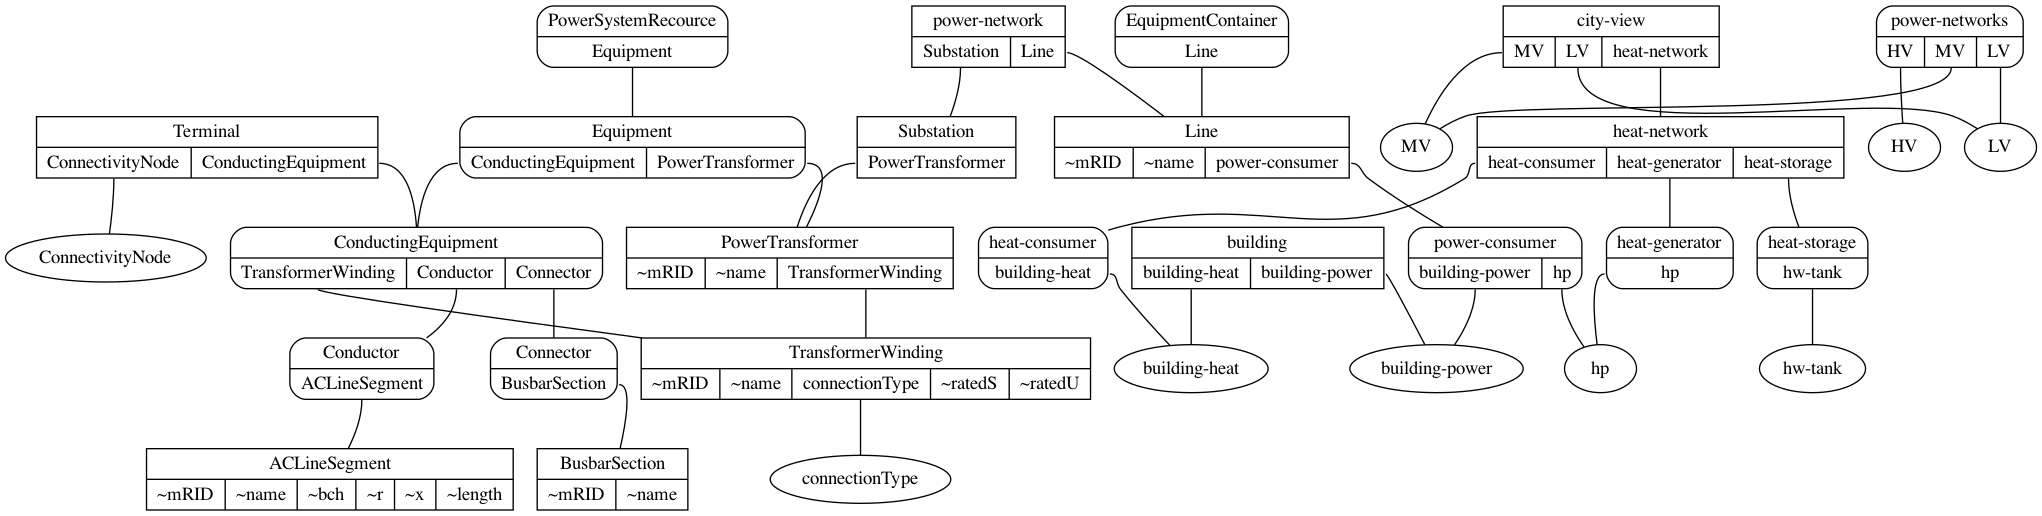

In [5]:
# City view

compile_hn(hn, parser, """
    power-network=<Substation, Line>
    power-networks={HV, MV, LV}
    city-view=<MV, LV, heat-network>
""")

draw_hn(hn, fname="/tmp/MEDA-CIM-multilevel-view", view=False, split_camel=False)
Image(filename='/tmp/MEDA-CIM-multilevel-view.png', width=1600, height=1200)

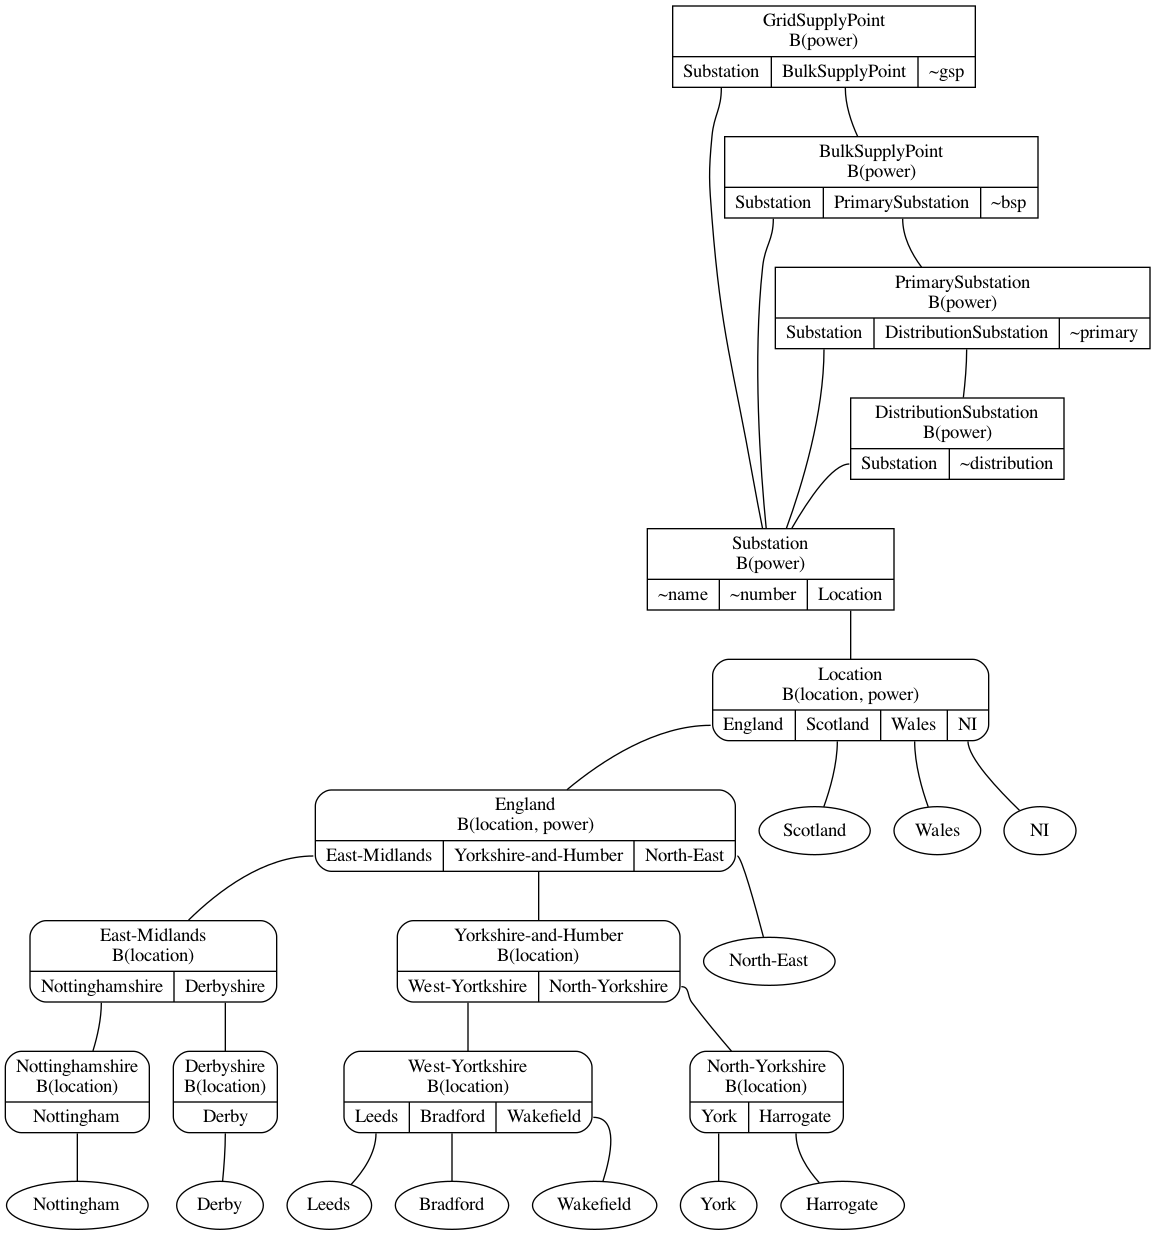

In [6]:
loc_hn = Hypernetwork()

compile_hn(loc_hn, parser, """
        GridSupplyPoint=<Substation, BulkSupplyPoint, ~gsp; B(power)>
        BulkSupplyPoint=<Substation, PrimarySubstation, ~bsp; B(power)>
        PrimarySubstation=<Substation, DistributionSubstation, ~primary; B(power)>
        DistributionSubstation=<Substation, ~distribution; B(power)>
        Substation=<~name, ~number, Location; B(power)>
        #AssetType={~gsp, ~bsp, ~primary, ~distribution; B(power)}
        
        Location={England, Scotland, Wales, NI; B(location)}
        England={East-Midlands, Yorkshire-and-Humber, North-East; B(location)}
        East-Midlands={Nottinghamshire, Derbyshire; B(location)}
        Yorkshire-and-Humber={West-Yortkshire, North-Yorkshire; B(location)}
        Nottinghamshire={Nottingham; B(location)}
        Derbyshire={Derby; B(location)}
        West-Yortkshire={Leeds, Bradford, Wakefield; B(location)}
        North-Yorkshire={York, Harrogate; B(location)}
""")

energy_hn = Hypernetwork()
energy_hn.union(loc_hn)

draw_hn(energy_hn, fname="/tmp/MEDA-energy-location", view=False, split_camel=False)
Image(filename='/tmp/MEDA-energy-location.png', width=800, height=1200)

{'Nottingham': [<hypernetworks.utils.HTPaths.HsPath object at 0x7fc9e0e043d0>, <hypernetworks.utils.HTPaths.HsPath object at 0x7fc9e0e043d0>], 'Leeds': [<hypernetworks.utils.HTPaths.HsPath object at 0x7fc9f010db90>, <hypernetworks.utils.HTPaths.HsPath object at 0x7fc9f010db90>]}


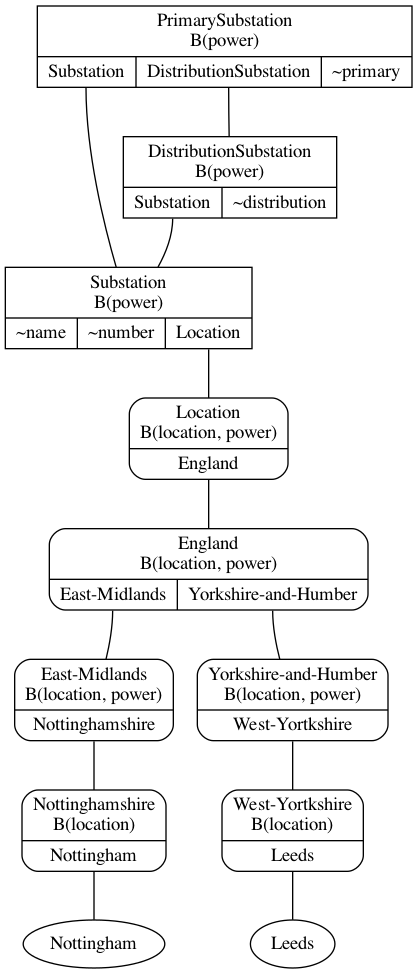

In [7]:
vertex_list = ["Nottingham", "Leeds", "PrimarySubstation"]
space = get_space(energy_hn, True, True, *vertex_list)

draw_hn(space, fname="/tmp/MEDA-energy-location-space", view=False, split_camel=False)
Image(filename='/tmp/MEDA-energy-location-space.png', width=300, height=400)

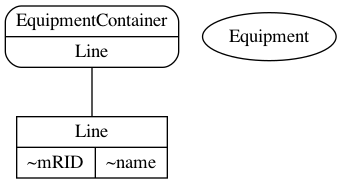

In [8]:
test1_hn = Hypernetwork()

compile_hn(test1_hn, parser, """
    EquipmentContainer=<Equipment>
    EquipmentContainer={Line}
    Line=<~mRID, ~name>
""")

draw_hn(test1_hn, fname="/tmp/MEDA-test1-hn", view=False, split_camel=False)
Image(filename='/tmp/MEDA-test1-hn.png', width=400, height=1200)

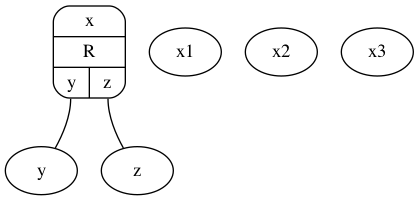

In [9]:
test2_hn = Hypernetwork()

compile_hn(test2_hn, parser, """
    x=<x1, x2, x3; R>
    x={y, z}
""")

draw_hn(test2_hn, fname="/tmp/test2-hn", view=False)
Image(filename='/tmp/test2-hn.png', width=400, height=1200)

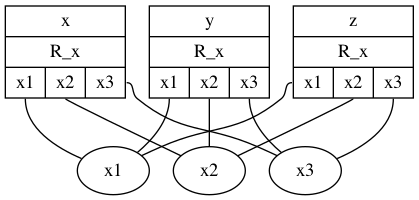

In [10]:
test3_hn = Hypernetwork()

compile_hn(test3_hn, parser, """
    x=<x1, x2, x3; R_x>
    y=<x1, x2, x3; R_x>
    z=<x1, x2, x3; R_x>
""")

draw_hn(test3_hn, fname="/tmp/test3-hn", view=False)
Image(filename='/tmp/test3-hn.png', width=400, height=1200)

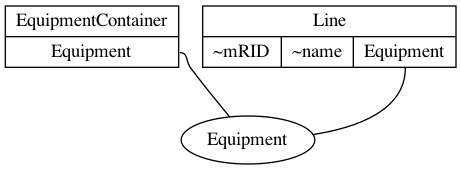

In [11]:
test4_hn = Hypernetwork()

compile_hn(test4_hn, parser, """
    EquipmentContainer=<Equipment>
    Line=<~mRID, ~name, Equipment>
""")

draw_hn(test4_hn, fname="/tmp/MEDA-test-4", view=False)
Image(filename='/tmp/MEDA-test-4.png', width=400, height=1200)

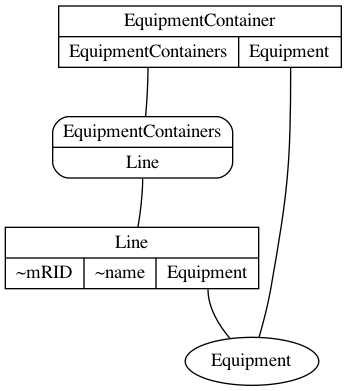

In [12]:
test5_hn = Hypernetwork()

compile_hn(test5_hn, parser, """
    EquipmentContainer=<EquipmentContainers, Equipment>
    EquipmentContainers={Line}
    Line=<~mRID, ~name, Equipment>
""")

draw_hn(test5_hn, fname="/tmp/MEDA-test5-hn", view=False, split_camel=False)
Image(filename='/tmp/MEDA-test5-hn.png', width=350, height=400)

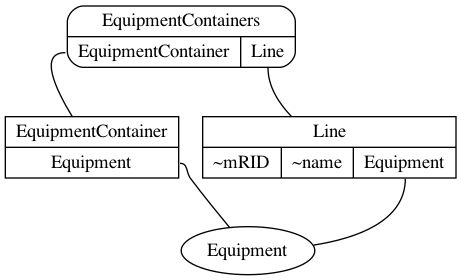

In [13]:
test6_hn = Hypernetwork()

compile_hn(test6_hn, parser, """
    EquipmentContainers={EquipmentContainer, Line}
    EquipmentContainer=<Equipment>
    Line=<~mRID, ~name, Equipment>
""")

draw_hn(test6_hn, fname="/tmp/MEDA-test6-hn", view=False, split_camel=False)
Image(filename='/tmp/MEDA-test6-hn.png', width=400, height=400)

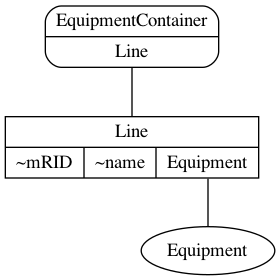

In [14]:
test7_hn = Hypernetwork()

compile_hn(test7_hn, parser, """
    EquipmentContainer={Line}
    Line=<~mRID, ~name, Equipment>
""")

draw_hn(test7_hn, fname="/tmp/MEDA-test7-hn", view=False, split_camel=False)
Image(filename='/tmp/MEDA-test7-hn.png', width=250, height=400)